# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

Iter     Function value   Gradient norm 
     0     3.040879e+01     7.392125e+00
 * time: 0.004967927932739258
     1     2.617401e+01     4.653148e+00
 * time: 0.01429891586303711
     2     1.974027e+01     5.909591e+00
 * time: 0.03728294372558594
     3     1.179272e+01     1.787487e+00
 * time: 0.06395411491394043
     4     1.038802e+01     1.895799e+00
 * time: 0.08212995529174805
     5     1.011541e+01     1.621967e+00
 * time: 0.19451498985290527
     6     9.507964e+00     1.414342e+00
 * time: 0.21309590339660645
     7     8.897406e+00     1.101654e+00
 * time: 0.23141098022460938
     8     8.627454e+00     8.353227e-01
 * time: 0.2499690055847168
     9     8.523030e+00     4.330901e-01
 * time: 0.2682669162750244
    10     8.457268e+00     4.782635e-01
 * time: 0.2860560417175293
    11     8.415660e+00     6.266967e-01
 * time: 0.2997770309448242
    12     8.369193e+00     6.204016e-01
 * time: 0.313060998916626
    13     8.335865e+00     3.237995e-01
 * time: 0.32

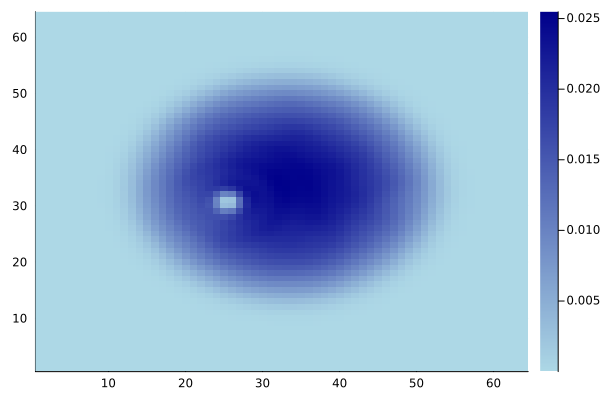

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential, and magnetic vector potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);


# Parameters
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

# Collect all the terms, build and run the model
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # spinless electrons
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)